# Risk-free rates

Examining the RF column in Fama and French.


In [1]:
import pandas as pd
filename = 'F-F_Research_Data_Factors.CSV'
ff_df = pd.read_csv(filename, skiprows=2)
print(f'Read in {len(ff_df)} records from {filename}.')
ff_df.head()

Read in 1242 records from F-F_Research_Data_Factors.CSV.


,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.38,-2.73,0.22
1,192608,2.64,-1.47,4.14,0.25
2,192609,0.36,-1.39,0.12,0.23
3,192610,-3.24,-0.13,0.65,0.32
4,192611,2.53,-0.16,-0.38,0.31


In [2]:
# Let's rename that first col to yyyymm
ff_df.rename(columns={"Unnamed: 0": "yyyymm", "Mkt-RF": "Mkt_minus_RF"}, inplace=True)
ff_df.dropna(axis='index', how='any', subset=['Mkt_minus_RF', 'SMB', 'HML', 'RF'], inplace=True)

In [3]:
# Drop if the yyyymm is just a year.
ff_df.drop(range(1146, 1241), inplace=True)
ff_df.tail()

,yyyymm,Mkt_minus_RF,SMB,HML,RF
1140,202107,1.27,-3.96,-1.75,0.00
1141,202108,2.90,-0.48,-0.13,0.00
1142,202109,-4.37,0.80,5.09,0.00
1143,202110,6.65,-2.28,-0.44,0.00
1144,202111,-1.55,-1.35,-0.52,0.00


In [4]:
# Make the yyyymm into a Python datetime
ff_df['Date'] = pd.to_datetime(ff_df.yyyymm, format='%Y%m')

# Make sure RF is numeric
ff_df['RF'] = pd.to_numeric(ff_df['RF'])

# Drop the old yyyymm column 
ff_df.drop(columns='yyyymm', inplace=True)


In [5]:
ff_df.head()

,Mkt_minus_RF,SMB,HML,RF,Date
0,2.96,-2.38,-2.73,0.22,1926-07-01
1,2.64,-1.47,4.14,0.25,1926-08-01
2,0.36,-1.39,0.12,0.23,1926-09-01
3,-3.24,-0.13,0.65,0.32,1926-10-01
4,2.53,-0.16,-0.38,0.31,1926-11-01


# Let's put the RF rate on a graph, by year.

In [6]:
ff_df.agg(['min', 'max'])

,Mkt_minus_RF,SMB,HML,RF,Date
min,0.00,0.00,0.00,-0.06,1926-07-01
max,-29.13,-17.29,-14.02,1.35,2021-11-01


In [7]:
ff_df['Date']

0      1926-07-01
1      1926-08-01
2      1926-09-01
3      1926-10-01
4      1926-11-01
          ...    
1140   2021-07-01
1141   2021-08-01
1142   2021-09-01
1143   2021-10-01
1144   2021-11-01
Name: Date, Length: 1145, dtype: datetime64[ns]

In [8]:
# New cols for year and month. See https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html

ff_df['year'] = ff_df['Date'].dt.year
ff_df['month'] = ff_df['Date'].dt.month

In [9]:
ff_df.head()

,Mkt_minus_RF,SMB,HML,RF,Date,year,month
0,2.96,-2.38,-2.73,0.22,1926-07-01,1926,7
1,2.64,-1.47,4.14,0.25,1926-08-01,1926,8
2,0.36,-1.39,0.12,0.23,1926-09-01,1926,9
3,-3.24,-0.13,0.65,0.32,1926-10-01,1926,10
4,2.53,-0.16,-0.38,0.31,1926-11-01,1926,11


In [10]:
# ff_df2 = ff_df.groupby(by='year').agg({'RF': ['min', 'mean', 'max']})
ff_min_df = ff_df.groupby(by='year').min()
ff_min_df.tail()


,Mkt_minus_RF,SMB,HML,RF,Date,month
year,,,,,,
2017,0.16,0.72,0.03,0.03,2017-01-01,1
2018,0.06,0.26,0.26,0.11,2018-01-01,1
2019,1.10,0.25,0.42,0.12,2019-01-01,1
2020,2.46,0.03,2.13,0.00,2020-01-01,1
2021,0.29,0.80,2.99,0.00,2021-01-01,1


In [11]:
ff_max_df = ff_df.groupby(by='year').max()
ff_max_df.tail()

,Mkt_minus_RF,SMB,HML,RF,Date,month
year,,,,,,
2017,3.57,-2.52,-3.75,0.09,2017-12-01,12
2018,-9.55,-4.82,-3.98,0.19,2018-12-01,12
2019,-6.94,-2.98,-4.95,0.21,2019-12-01,12
2020,-13.38,-4.89,-14.02,0.13,2020-12-01,12
2021,-4.37,-3.96,-7.76,0.00,2021-11-01,11


<AxesSubplot:xlabel='year', ylabel='RF'>

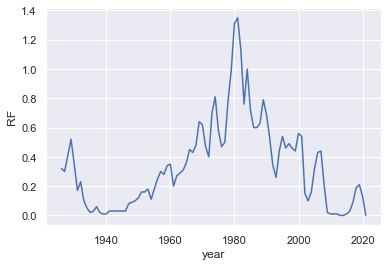

In [12]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="year", y="RF", data=ff_max_df)

<AxesSubplot:xlabel='year', ylabel='RF'>

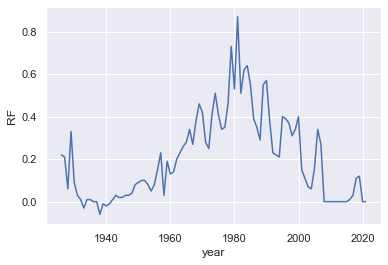

In [13]:
sns.lineplot(x="year", y="RF", data=ff_min_df)

# The CAPM model and pricing $\beta$ and $\alpha$

This is written quite a few different ways. 

Here's one from https://www.investopedia.com/terms/c/capm.asp: $ E[R_i] = R_f + \beta_i (E[R_m] - R_f) $

where:

$E[R_i]$ is expected return of investment

$R_f$ is risk-free rate

$β_i$ is beta of the investment

$(ER_m − R_f)$ is market risk premium

$E[x]$ means the expectation of x. The left side is an expected value, not a certainty.

But you'll more often see it written:

$ R_i = R_f + \beta_i (R_m - R_f) $

# Calculating $\beta$

$\beta_i = \frac{Cov(R_m, R_i)}{Var(R_m)}$

Let's use TSLA as our stock, and see how it varies (and covaries) against the S&P 500 Index.

In [14]:
filename = 'TSLA and SPY.xlsx'
tsla_df = pd.read_excel(filename, sheet_name='TSLA')
print(f'Read in {len(tsla_df)} records from {filename}.')
tsla_df.head()

Read in 61 records from TSLA and SPY.xlsx.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-01,50.610001,57.478001,48.402000,49.998001,49.998001,597700000
1,2017-03-01,50.835999,56.400002,48.556000,55.660000,55.660000,535176500
2,2017-04-01,57.380001,62.959999,56.916000,62.813999,62.813999,584753000
3,2017-05-01,62.976002,68.578003,58.152000,68.202003,68.202003,740231500
4,2017-06-01,68.800003,77.398003,66.842003,72.321999,72.321999,929755500


In [15]:
spx_df = pd.read_excel(filename, sheet_name='GSPC')
print(f'Read in {len(spx_df)} records from {filename}.')
spx_df.head()

Read in 61 records from TSLA and SPY.xlsx.


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2017-02-01,2285.59,2371.54,2271.65,2363.64,2363.64,69162420000
1,2017-03-01,2380.13,2400.98,2322.25,2362.72,2362.72,81547770000
2,2017-03-31,2362.34,2398.16,2328.95,2384.20,2384.20,65265670000
3,2017-04-30,2388.50,2418.71,2352.72,2411.80,2411.80,79607170000
4,2017-05-31,2415.65,2453.82,2405.70,2423.41,2423.41,81002490000


In [16]:
cols_to_drop = ['Open', 'High', 'Low', 'Close', 'Volume']
tsla_df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop.remove('Close')
cols_to_drop.append('Close*')
spx_df.drop(columns=cols_to_drop, inplace=True)

In [17]:
spx_df.columns # ['Date', 'Adj Close**']
tsla_df.head()

,Date,Adj Close
0,2017-02-01,49.998001
1,2017-03-01,55.660000
2,2017-04-01,62.813999
3,2017-05-01,68.202003
4,2017-06-01,72.321999


In [18]:
# Prepare to join the tables on date
def coerce_to_datetime(df: pd.DataFrame, col: str):
    df[col] = pd.to_datetime(df[col])
    return

In [19]:
coerce_to_datetime(tsla_df, 'Date')
coerce_to_datetime(spx_df, 'Date')

tsla_df.set_index('Date')
spx_df.set_index('Date')

tsla_df.Date

0    2017-02-01
1    2017-03-01
2    2017-04-01
3    2017-05-01
4    2017-06-01
        ...    
56   2021-10-01
57   2021-11-01
58   2021-12-01
59   2022-01-01
60   2022-01-14
Name: Date, Length: 61, dtype: datetime64[ns]

In [20]:
comb_df = tsla_df.join(spx_df, lsuffix='TSLA', rsuffix='SPX')
comb_df

,DateTSLA,Adj Close,DateSPX,Adj Close**
0,2017-02-01,49.998001,2017-02-01,2363.64
1,2017-03-01,55.660000,2017-03-01,2362.72
2,2017-04-01,62.813999,2017-03-31,2384.20
3,2017-05-01,68.202003,2017-04-30,2411.80
4,2017-06-01,72.321999,2017-05-31,2423.41
...,...,...,...,...
56,2021-10-01,1114.000000,2021-09-30,4605.38
57,2021-11-01,1144.760010,2021-10-31,4567.00
58,2021-12-01,1056.780029,2021-12-01,4766.18
59,2022-01-01,1049.609985,2022-01-01,4662.85


In [21]:
import numpy as np
tsla_close = np.array(comb_df['Adj Close'])
spx_close = np.array(comb_df['Adj Close**'])

In [22]:
tsla_close[:5]

array([49.998001, 55.66    , 62.813999, 68.202003, 72.321999])

In [23]:
def numpy_shift(arr: np.ndarray) -> np.ndarray:
    ans = np.roll(arr, 1) # np.roll rotates all over by 1 and the last el becomes the first
    ans[0] = np.nan
    return ans


In [24]:
orig = np.arange(1,20, dtype=float)
new = numpy_shift(orig)
new

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [25]:
ln_ret = np.log(orig / new)
ln_ret

array([       nan, 0.69314718, 0.40546511, 0.28768207, 0.22314355,
       0.18232156, 0.15415068, 0.13353139, 0.11778304, 0.10536052,
       0.09531018, 0.08701138, 0.08004271, 0.07410797, 0.06899287,
       0.06453852, 0.06062462, 0.05715841, 0.05406722])

In [26]:
tsla_lag1 = numpy_shift(tsla_close)
tsla_ln_ret = np.log(tsla_close / tsla_lag1)
tsla_ln_ret

array([        nan,  0.10727873,  0.12091621,  0.08229597,  0.05865442,
       -0.1114599 ,  0.09554342, -0.04247409, -0.0284574 , -0.07086258,
        0.00806196,  0.12925455, -0.03226688, -0.25392041,  0.09925461,
       -0.03169821,  0.18604326, -0.14002146,  0.01173743, -0.13043907,
        0.24217048,  0.03827167, -0.05176198, -0.0806288 ,  0.04103308,
       -0.13365648, -0.15912386, -0.25394527,  0.18801211,  0.07809239,
       -0.06851695,  0.06544948,  0.26806129,  0.04659215,  0.23735979,
        0.44157829,  0.02642437, -0.24278154,  0.40020961,  0.0657304 ,
        0.25710868,  0.28142067,  0.55471929, -0.1497622 , -0.1003718 ,
        0.38030845,  0.21773078,  0.1173437 , -0.16103823, -0.01126979,
        0.06029256, -0.12637239,  0.083548  ,  0.01097385,  0.06822418,
        0.05263259,  0.36223025,  0.02723788, -0.07996844, -0.00680792,
        0.        ])

In [27]:
spx_lag1 = numpy_shift(spx_close)
spx_ln_ret = np.log(spx_close / spx_lag1)
spx_ln_ret

array([        nan, -0.00038931,  0.00905014,  0.01150972,  0.00480228,
        0.01916396,  0.00054634,  0.01911896,  0.0219456 ,  0.02769552,
        0.0097836 ,  0.05465742, -0.03972612, -0.02725251,  0.00271511,
        0.0213782 ,  0.00483071,  0.03538798,  0.02981432,  0.00428511,
       -0.07192935,  0.01770178, -0.09626529,  0.07574215,  0.02929559,
        0.01776554,  0.03856034, -0.06804089,  0.06665832,  0.01304277,
       -0.01825731,  0.01703524,  0.02022582,  0.03348029,  0.02818874,
       -0.00162942, -0.08785952, -0.13366777,  0.1194209 ,  0.04428649,
        0.01822138,  0.05363678,  0.0677191 , -0.0400181 , -0.02805568,
        0.10214645,  0.036449  , -0.01119912,  0.0257569 ,  0.04156281,
        0.05109732,  0.00547151,  0.02197084,  0.02249323,  0.02857805,
       -0.04873776,  0.06685821, -0.00836865,  0.04268861, -0.0219183 ,
        0.        ])

In [28]:
# Should drop the first el (NaN) and the last, mid-month el (which is the same as the penultimate)
spx_ln_ret = spx_ln_ret[1:-1].copy()
spx_ln_ret

array([-0.00038931,  0.00905014,  0.01150972,  0.00480228,  0.01916396,
        0.00054634,  0.01911896,  0.0219456 ,  0.02769552,  0.0097836 ,
        0.05465742, -0.03972612, -0.02725251,  0.00271511,  0.0213782 ,
        0.00483071,  0.03538798,  0.02981432,  0.00428511, -0.07192935,
        0.01770178, -0.09626529,  0.07574215,  0.02929559,  0.01776554,
        0.03856034, -0.06804089,  0.06665832,  0.01304277, -0.01825731,
        0.01703524,  0.02022582,  0.03348029,  0.02818874, -0.00162942,
       -0.08785952, -0.13366777,  0.1194209 ,  0.04428649,  0.01822138,
        0.05363678,  0.0677191 , -0.0400181 , -0.02805568,  0.10214645,
        0.036449  , -0.01119912,  0.0257569 ,  0.04156281,  0.05109732,
        0.00547151,  0.02197084,  0.02249323,  0.02857805, -0.04873776,
        0.06685821, -0.00836865,  0.04268861, -0.0219183 ])

In [29]:
tsla_ln_ret = tsla_ln_ret[1:-1].copy()
tsla_ln_ret

array([ 0.10727873,  0.12091621,  0.08229597,  0.05865442, -0.1114599 ,
        0.09554342, -0.04247409, -0.0284574 , -0.07086258,  0.00806196,
        0.12925455, -0.03226688, -0.25392041,  0.09925461, -0.03169821,
        0.18604326, -0.14002146,  0.01173743, -0.13043907,  0.24217048,
        0.03827167, -0.05176198, -0.0806288 ,  0.04103308, -0.13365648,
       -0.15912386, -0.25394527,  0.18801211,  0.07809239, -0.06851695,
        0.06544948,  0.26806129,  0.04659215,  0.23735979,  0.44157829,
        0.02642437, -0.24278154,  0.40020961,  0.0657304 ,  0.25710868,
        0.28142067,  0.55471929, -0.1497622 , -0.1003718 ,  0.38030845,
        0.21773078,  0.1173437 , -0.16103823, -0.01126979,  0.06029256,
       -0.12637239,  0.083548  ,  0.01097385,  0.06822418,  0.05263259,
        0.36223025,  0.02723788, -0.07996844, -0.00680792])

In [30]:
# Get the variance for SPX by itself.

m1 = np.array([spx_ln_ret, tsla_ln_ret])
var = np.var(spx_ln_ret)
var

0.0019953857529041285

In [31]:
m1

array([[-3.89305940e-04,  9.05014056e-03,  1.15097184e-02,
         4.80228255e-03,  1.91639615e-02,  5.46343056e-04,
         1.91189572e-02,  2.19455989e-02,  2.76955153e-02,
         9.78360390e-03,  5.46574178e-02, -3.97261156e-02,
        -2.72525130e-02,  2.71511175e-03,  2.13782024e-02,
         4.83071350e-03,  3.53879800e-02,  2.98143217e-02,
         4.28510672e-03, -7.19293491e-02,  1.77017768e-02,
        -9.62652871e-02,  7.57421548e-02,  2.92955930e-02,
         1.77655418e-02,  3.85603364e-02, -6.80408889e-02,
         6.66583195e-02,  1.30427675e-02, -1.82573077e-02,
         1.70352405e-02,  2.02258196e-02,  3.34802916e-02,
         2.81887410e-02, -1.62941659e-03, -8.78595209e-02,
        -1.33667769e-01,  1.19420896e-01,  4.42864902e-02,
         1.82213810e-02,  5.36367784e-02,  6.77191021e-02,
        -4.00181032e-02, -2.80556803e-02,  1.02146448e-01,
         3.64489973e-02, -1.11991168e-02,  2.57568997e-02,
         4.15628087e-02,  5.10973221e-02,  5.47150655e-0

In [32]:
cov_mat = np.cov(m1)
cov_mat

array([[0.00202979, 0.00354849],
       [0.00354849, 0.03002502]])

In [33]:
cov = cov_mat[0][1]
cov

0.0035484879000732047

In [34]:
beta = cov / var
beta

1.7783468158518507

# Let's take a look at the plot of SPX returns vs TSLA

<AxesSubplot:>

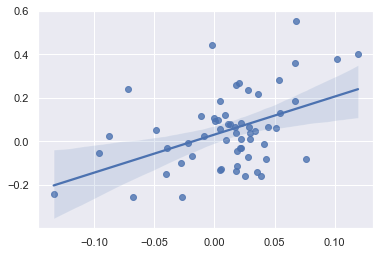

In [35]:
sns.regplot(x=spx_ln_ret, y=tsla_ln_ret)

# Calculating $\alpha$

You're going to figure this out as part of the homework.

# Correlation 

Helpful overviews: 
* https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/
* https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp

In [36]:
import pandas_datareader as pdr # you'll need to pip install this first
import datetime as dt
import matplotlib.pyplot as plt 
 
tickers = ['AAPL', 'TSLA', 'GLD', 'WFC', 'IBM', 'BTC-USD', '^GSPC']
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2022, 1, 1)
 
df = pdr.get_data_yahoo(tickers, start, end, interval="m")
price_df = df['Adj Close']
price_df.head()

Symbols,AAPL,TSLA,GLD,WFC,IBM,BTC-USD,^GSPC
Date,,,,,,,
2017-01-01,28.556141,50.386002,115.550003,48.528637,132.651108,970.403015,2278.870117
2017-02-01,32.236557,49.998001,119.230003,49.863972,136.679611,1179.969971,2363.639893
2017-03-01,33.952705,55.660000,118.720001,48.277096,133.408844,1071.790039,2362.719971
2017-04-01,33.950344,62.813999,120.769997,46.698513,122.798332,1347.890015,2384.199951
2017-05-01,36.103409,68.202003,120.620003,44.356644,116.930023,2286.409912,2411.800049


In [37]:
ret_df = np.log(price_df/price_df.shift())
ret_df.head()

Symbols,AAPL,TSLA,GLD,WFC,IBM,BTC-USD,^GSPC
Date,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,0.121229,-0.007730,0.031351,0.027145,0.029917,0.195533,0.036523
2017-03-01,0.051867,0.107279,-0.004287,-0.032341,-0.024221,-0.096159,-0.000389
2017-04-01,-0.000070,0.120916,0.017120,-0.033245,-0.082875,0.229210,0.009050
2017-05-01,0.061488,0.082296,-0.001243,-0.051450,-0.048968,0.528442,0.011510


In [38]:
corr_df = ret_df.corr()
corr_df

Symbols,AAPL,TSLA,GLD,WFC,IBM,BTC-USD,^GSPC
Symbols,,,,,,,
AAPL,1.000000,0.515729,0.198509,0.173612,0.316201,0.265576,0.644576
TSLA,0.515729,1.000000,0.221481,0.236859,0.091504,0.223170,0.461219
GLD,0.198509,0.221481,1.000000,-0.159952,0.015733,0.089110,0.133034
WFC,0.173612,0.236859,-0.159952,1.000000,0.431528,0.135028,0.608024
IBM,0.316201,0.091504,0.015733,0.431528,1.000000,-0.031455,0.663111
BTC-USD,0.265576,0.223170,0.089110,0.135028,-0.031455,1.000000,0.279979
^GSPC,0.644576,0.461219,0.133034,0.608024,0.663111,0.279979,1.000000


<Figure size 432x288 with 0 Axes>

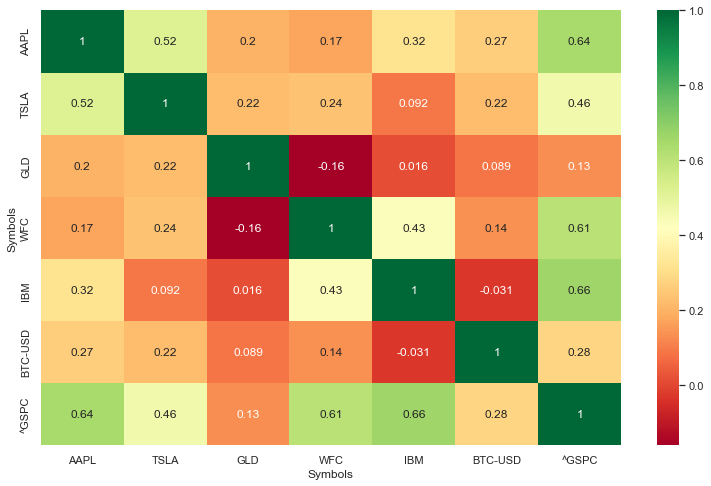

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

# Value at Risk

General Reference: https://www.investopedia.com/articles/04/092904.asp

With Excel and Python: https://blog.quantinsti.com/calculating-value-at-risk-in-excel-python/

## Historical method

- Import daily data and calculate the daily returns
- Sort the returns
- Calculate the VaR for 90%, 95%, or 99% confidence levels (quantile function)


In [40]:
# Import daily data
tickers = ['TSLA']
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2022, 1, 1)
 
df = pdr.get_data_yahoo(tickers, start, end, interval="d")
price_df = df['Adj Close']
price_df.head()

Symbols,TSLA
Date,
2017-01-03,43.397999
2017-01-04,45.397999
2017-01-05,45.349998
2017-01-06,45.801998
2017-01-09,46.256001


In [41]:
# Calculate daily returns (and dropna to get rid of the first NaN)
ret_df = np.log(price_df/price_df.shift())

ret_df.dropna(inplace=True)

ret_df.head()

Symbols,TSLA
Date,
2017-01-04,0.045055
2017-01-05,-0.001058
2017-01-06,0.009918
2017-01-09,0.009863
2017-01-10,-0.006115


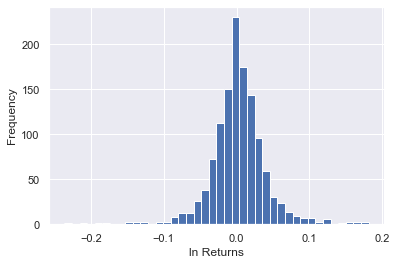

In [42]:
plt.hist(ret_df, bins=40)
plt.xlabel('ln Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [43]:
asset = 'TSLA'
ret_df.sort_values(asset, inplace=True, ascending=True)
ret_df.head()

Symbols,TSLA
Date,
2020-09-08,-0.236518
2020-03-16,-0.205522
2020-02-05,-0.188450
2020-03-18,-0.174763
2018-09-28,-0.149679


In [44]:
ret_df.tail()

Symbols,TSLA
Date,
2018-10-01,0.159966
2019-10-24,0.162707
2020-03-19,0.168794
2021-03-09,0.179327
2020-02-03,0.181445


In [45]:
# Calculating VaR with the quantile function
ln_var_90 = ret_df[asset].quantile(0.10)
ln_var_95 = ret_df[asset].quantile(0.05)
ln_var_99 = ret_df[asset].quantile(0.01)

var_90 = np.exp(ln_var_90)
var_95 = np.exp(ln_var_95)
var_99 = np.exp(ln_var_99)

print(f'Following are based on {asset} history.')
print(f'  90% confidence level: loss of {(1.0-var_90):.3%}')
print(f'  95% confidence level: loss of {(1.0-var_95):.3%}')
print(f'  99% confidence level: loss of {(1.0-var_99):.3%}')

Following are based on TSLA history.
  90% confidence level: loss of 3.445%
  95% confidence level: loss of 5.017%
  99% confidence level: loss of 9.576%


## Variance-covariance method

- Import the daily data
- Calculate mean and standard deviation
- Calculate VaR using .ppf (point percentile function)

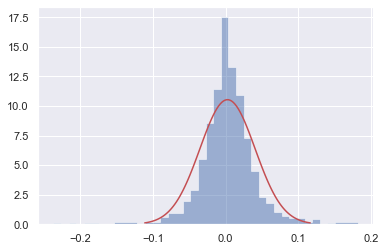

In [46]:
from scipy.stats import norm

mean = np.mean(ret_df[asset])
std_dev = np.std(ret_df[asset])
ret_df[asset].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

plt.plot(x, norm.pdf(x, mean, std_dev), 'r')
plt.show()

In [47]:
ln_var_90 = norm.ppf(0.10, mean, std_dev)
ln_var_95 = norm.ppf(0.05, mean, std_dev)
ln_var_99 = norm.ppf(0.01, mean, std_dev)

var_90 = np.exp(ln_var_90)
var_95 = np.exp(ln_var_95)
var_99 = np.exp(ln_var_99)

print(f'Following are based on the normal curve.')
print(f'  90% confidence level: loss of {(1.0-var_90):.3%}')
print(f'  95% confidence level: loss of {(1.0-var_95):.3%}')
print(f'  99% confidence level: loss of {(1.0-var_99):.3%}')

Following are based on the normal curve.
  90% confidence level: loss of 4.497%
  95% confidence level: loss of 5.802%
  99% confidence level: loss of 8.203%


# Pythonic
## first, some features that are no longer Pythonic

Guido (BDFL) says:
    
About 12 years ago, Python acquired lambda, reduce(), filter() and map(), courtesy of (I believe) a Lisp hacker who missed them and submitted working patches. But, despite of the PR value, I think these features should be cut from Python 3000.

- https://www.artima.com/weblogs/viewpost.jsp?thread=98196
- lambda Reference: https://docs.python.org/3/tutorial/controlflow.html?highlight=lambda

In [48]:
def is_even(x: int) -> bool:
    return (x % 2 == 0) # "x mod 2 equals 0"

nums = list(range(10)) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

evens = filter(lambda x: is_even(x), nums)
evens

In [49]:
list(evens)

[0, 2, 4, 6, 8]

In [50]:
## List comprehension is more pythonic than filter + lambda

In [51]:
[x for x in nums if is_even(x)]

[0, 2, 4, 6, 8]

## map

```python
map(built_in_or_user_function, iterable)
```

Helpful examples: https://www.guru99.com/python-map-function.html

### Again, list comprehension may be more comprehensible

In [52]:
def square(x: int) -> int:
    return x * x

squares = map(square, nums)
list(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [53]:
[square(x) for x in nums]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## reduce has been migrated

Look up functools.reduce() if you want to.

## More on dictionaries

Helpful examples: https://realpython.com/python-dicts/

Recall this code from a few minutes ago:

In [54]:
ln_var_90 = norm.ppf(0.10, mean, std_dev)
ln_var_95 = norm.ppf(0.05, mean, std_dev)
ln_var_99 = norm.ppf(0.01, mean, std_dev)

var_90 = np.exp(ln_var_90)
var_95 = np.exp(ln_var_95)
var_99 = np.exp(ln_var_99)

print(f'Following are based on the normal curve.')
print(f'  90% confidence level: loss of {(1.0-var_90):.3%}')
print(f'  95% confidence level: loss of {(1.0-var_95):.3%}')
print(f'  99% confidence level: loss of {(1.0-var_99):.3%}')

Following are based on the normal curve.
  90% confidence level: loss of 4.497%
  95% confidence level: loss of 5.802%
  99% confidence level: loss of 8.203%


### Let's convert it to a dictionary

key is 90, 95, or 99. value is some transformation.

Let's write a function first.

In [55]:
def VaR(conf_level: int, mean: float, std_dev: float) -> float:
    tail = 1.0 - (conf_level / 100.0)
    ln_VaR = norm.ppf(tail, mean, std_dev)
    return 1.0 - np.exp(ln_VaR)
print(f'  95% confidence level: loss of {(VaR(95, mean, std_dev)):.3%}')

  95% confidence level: loss of 5.802%


### Dictionary comprehension

In [56]:
var_dict = {conf_level : VaR(conf_level, mean, std_dev) for conf_level in [90, 95, 99]}
var_dict

{90: 0.04496831442311067, 95: 0.058022232781191896, 99: 0.08202986029503578}

### Walking through the key, value pairs

items() is your friend

In [57]:
print(f'Following are based on the normal curve.')
for conf_level, var in var_dict.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}'  )

Following are based on the normal curve.
  90% confidence level: loss of 4.497%
  95% confidence level: loss of 5.802%
  99% confidence level: loss of 8.203%


### Just the keys? Just the values?

In [58]:
print(f'Keys are: {var_dict.keys()}')
print(f'Vals are: {var_dict.values()}')

Keys are: dict_keys([90, 95, 99])
Vals are: dict_values([0.04496831442311067, 0.058022232781191896, 0.08202986029503578])


### Updating a value


In [59]:
var_dict[90] = 42

### Accessing the value at a key

In [60]:
var_dict[90]

42

### Deleting a key

In [61]:
del var_dict[90]
for conf_level, var in var_dict.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}')

  95% confidence level: loss of 5.802%
  99% confidence level: loss of 8.203%


### Addng a new key

In [62]:
var_dict[50] = 0.5
for conf_level, var in var_dict.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}')

  95% confidence level: loss of 5.802%
  99% confidence level: loss of 8.203%
  50% confidence level: loss of 50.000%


In [63]:
### pop both retrieves the value at the key and removes that key, value pair

In [64]:
old_50 = var_dict.pop(50)
print(f'Just removed {old_50}')
for conf_level, var in var_dict.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}')

Just removed 0.5
  95% confidence level: loss of 5.802%
  99% confidence level: loss of 8.203%


### Can use update() on dictionaries

In [65]:
new_dict = {conf_level : VaR(conf_level, mean, std_dev) for conf_level in [90, 98]}
new_dict

{90: 0.04496831442311067, 98: 0.07250107590522992}

In [66]:
var_dict.update(new_dict) # replaces existing key 90 and adds new key 98
for conf_level, var in var_dict.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}')

  95% confidence level: loss of 5.802%
  99% confidence level: loss of 8.203%
  90% confidence level: loss of 4.497%
  98% confidence level: loss of 7.250%


### Note that Python maintains insertion order

### How to sort by keys

(Side note: Look at the age of the Stackoverflow answers! Make sure the answers work for Python 3.)

Helpful: https://stackoverflow.com/questions/11089655/sorting-dictionary-python-3

In [67]:
sorted_vars = {k: var_dict[k] for k in sorted(var_dict)}
for conf_level, var in sorted_vars.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}')

  90% confidence level: loss of 4.497%
  95% confidence level: loss of 5.802%
  98% confidence level: loss of 7.250%
  99% confidence level: loss of 8.203%


### KeyError when I ask for a missing key

In [68]:
var_dict.pop(1)

KeyError: 1

### Can surround with try / except to catch the KeyError

In [69]:
looking_for = [95, 96, 97, 98, 99]
for conf_level in looking_for:
    try:
        print(f'At {conf_level}% confidence: Loss of {var_dict[conf_level]:.3%}')
    except KeyError:
        print(f'(Sorry, no {conf_level}% confidence level in the dictionary)')
        

At 95% confidence: Loss of 5.802%
(Sorry, no 96% confidence level in the dictionary)
(Sorry, no 97% confidence level in the dictionary)
At 98% confidence: Loss of 7.250%
At 99% confidence: Loss of 8.203%


## Word counter with regular dictionary tools

Basic idea: Add 1 to the existing dictionary entry. If there's a KeyError, then this is the first word.

Text extracted from "Green Eggs and Ham" (by Dr. Seuss)

In [70]:
green_eggs = [
    'do', 'you', 'like', 'green', 'eggs', 'and', 'ham',
    'i', 'do', 'not', 'like', 'them', 'sam-i-am',
    'i', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham',
    'would', 'you', 'like', 'them', 'here', 'or', 'there',
    'i', 'would', 'not', 'like', 'them', 'here', 'or', 'there',
    'i', 'would', 'not', 'like', 'them', 'anywhere',
    'i', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham',
    'i', 'do', 'not', 'like', 'them', 'sam-i-am']

In [71]:
d = {}
for w in green_eggs:
    try:
        d[w] += 1
    except KeyError:
        d[w] = 1
print (d)

{'do': 5, 'you': 2, 'like': 8, 'green': 3, 'eggs': 3, 'and': 3, 'ham': 3, 'i': 6, 'not': 6, 'them': 5, 'sam-i-am': 2, 'would': 3, 'here': 2, 'or': 2, 'there': 2, 'anywhere': 1}


### Printing the dictionary sorted by value

In [75]:
for w in sorted(d, key=d.get, reverse=True):
    print(f'  {w:10s} - {d[w]:2d}')

  like       -  8
  i          -  6
  not        -  6
  do         -  5
  them       -  5
  green      -  3
  eggs       -  3
  and        -  3
  ham        -  3
  would      -  3
  you        -  2
  sam-i-am   -  2
  here       -  2
  or         -  2
  there      -  2
  anywhere   -  1


## Word counter with defaultdict

Basic idea: use a subclass of dict with the behavior that we create a dictionary entry with an int value (instead of throwing a KeyError)

Remember: the subclass inherits behaviors and variables from the parent class.

In [73]:
from collections import defaultdict
d2 = defaultdict(int)
for w in green_eggs:
    d2[w] += 1
print(d2)

defaultdict(<class 'int'>, {'do': 5, 'you': 2, 'like': 8, 'green': 3, 'eggs': 3, 'and': 3, 'ham': 3, 'i': 6, 'not': 6, 'them': 5, 'sam-i-am': 2, 'would': 3, 'here': 2, 'or': 2, 'there': 2, 'anywhere': 1})


In [76]:
for w in sorted(d, key=d2.get, reverse=True):
    print(f'  {w:10s} - {d2[w]:2d}')

  like       -  8
  i          -  6
  not        -  6
  do         -  5
  them       -  5
  green      -  3
  eggs       -  3
  and        -  3
  ham        -  3
  would      -  3
  you        -  2
  sam-i-am   -  2
  here       -  2
  or         -  2
  there      -  2
  anywhere   -  1
